In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("subset_census-income_data.csv", header=None, skiprows=17, names=["age", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "class"], index_col=False)


In [5]:
df.head()

,age,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.260606,10.254545,657.315152,119.721212,40.800000
std,13.026192,2.610146,3384.261257,452.696253,10.976805
min,17.000000,2.000000,0.000000,0.000000,2.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,44.000000
max,79.000000,16.000000,34095.000000,2179.000000,80.000000


In [14]:
df["age"].describe()

count    165.000000
mean      38.260606
std       13.026192
min       17.000000
25%       29.000000
50%       37.000000
75%       48.000000
max       79.000000
Name: age, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import numpy as np

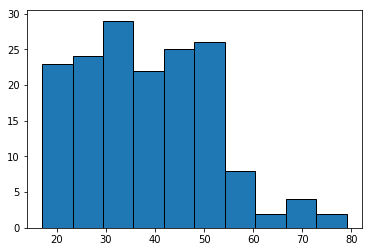

In [20]:
plt.hist(df["age"], bins=10, ec='black')
plt.show()

In [40]:
df.cov()

,age,education_num,capital_gain,capital_loss,hours_per_week
age,169.681670,0.219845,-4.816351e+03,880.231633,0.534146
education_num,0.219845,6.812860,-3.947149e+02,23.150665,7.545122
capital_gain,-4816.350924,-394.714856,1.145322e+07,-79174.411604,-6.680488
capital_loss,880.231633,23.150665,-7.917441e+04,204933.897413,-111.915854
hours_per_week,0.534146,7.545122,-6.680488e+00,-111.915854,120.490244


In [23]:
df[["age", "capital_gain", "capital_loss", "hours_per_week"]].corr()

,age,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.109254,0.149270,0.003736
capital_gain,-0.109254,1.000000,-0.051679,-0.000180
capital_loss,0.149270,-0.051679,1.000000,-0.022522
hours_per_week,0.003736,-0.000180,-0.022522,1.000000


In [34]:
df_corr = df[["age", "capital_gain", "capital_loss", "hours_per_week"]].corr()

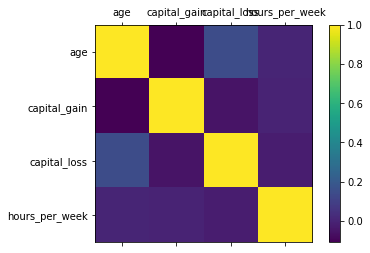

In [37]:
alpha = ["age", "capital_gain", "capital_loss", "hours_per_week"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [1]:
import math

In [18]:
Ho = -(5./14.*math.log(5./14., 2) + 4./14.*math.log(4./14., 2) + 5./14.*math.log(5./14., 2))
Hh = -(7./14.*math.log(7./14., 2)*2)
Hp = -(5./14.*math.log(5./14., 2) + 9./14.*math.log(9./14., 2))
Hoh = -(3./14.*math.log(3./14., 2)*2 + 2./14.*math.log(2./14., 2)*4)
Hop = -(2./14.*math.log(2./14., 2)*2 + 3./14.*math.log(3./14., 2)*2 + 4./14.*math.log(4./14., 2))
Hhp = -(3./14.*math.log(3./14., 2) + 4./14.*math.log(4./14., 2) + 6./14.*math.log(6./14., 2) + \
        1./14.*math.log(1./14., 2))

In [19]:
def U(a, b, ab):
    return 2*(a + b - ab)/(a + b)

In [20]:
print Ho, Hh, Hoh
print 2*(Ho + Hh - Hoh)/(Ho + Hh)

1.57740628285 1.0 2.55665670746
0.0161011288966


In [21]:
Uop = U(Ho, Hp, Hop)
Uhp = U(Hh, Hp, Hhp)
Uoh = U(Ho, Hh, Hoh)

print Uop, Uhp, Uoh

0.196012694248 0.156508375153 0.0161011288966


In [24]:
G = (Uop + Uhp)/math.sqrt(Uoh + 2)

In [25]:
G

0.24827267441452686

In [26]:
print Ho, Hh, Hp, Hoh, Hop, Hhp

1.57740628285 1.0 0.940285958671 2.55665670746 2.27094242175 1.78845045731
